In [56]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
import time

In [97]:
trump_speech_df = pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Project 5/TrumpSpeech/MrTrumpSpeeches.csv',error_bad_lines=False, warn_bad_lines=False,header=0, delimiter="\~", quoting=3, engine='python')
# trump_speech_df.head()
def remove_nextline(text):
#     text = (re.sub("\n"," ",text).lower())
    return re.sub("[^a-zA-Z]"," ", text).lower()


trump_speech_df['subtitle1'] = trump_speech_df['subtitles'].apply(remove_nextline)


def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

trump_speech_df['tokenized_subtitle'] = trump_speech_df['subtitle1'].apply(word_tokenize)

stopset = stopwords.words('english') + list(string.punctuation)
words_meaningful = [w for w in trump_speech_df['tokenized_subtitle'] if not w in stopset]
words_stopwords = [w for w in trump_speech_df['tokenized_subtitle'] if w in stopset]
trump_speech_df['word_count']=len(words_meaningful)
trump_speech_df['subtitle_stop']=trump_speech_df['tokenized_subtitle'] .apply(lambda x: [item for item in x if item not in stopset])
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,word_count,subtitle_stop
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...",836,"[presidents, united, states, mr, go, trapp, fa..."
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...",836,"[officially, tuesday, november, ever, think, h..."
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...",836,"[music, music, music, greatness, country, lead..."
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...",836,"[welcome, stars, president, music, place, live..."
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...",836,"[thank, music, great, people, granna, three, d..."


In [58]:
trump_speech_df.sort_values('upload_date')

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop
795,WPnzNomBjuE,Donald Trump Rally Speech Events Press Confere...,20160201,LIVE Donald Trump Cedar Rapids Iowa Rally Doub...,1728.0,5.000000,38.0,0.0,prism growing government and you know all...,prism growing government and you know all...,"[prism, growing, government, and, you, know, a...","[prism, growing, government, know, allowing, t..."
832,ZqINGT-_Dno,Donald Trump Rally Speech Events Press Confere...,20160201,LIVE Donald Trump Rally in Waterloo Iowa on Ca...,8150.0,4.586207,130.0,15.0,time we've all worked very hard for this ...,time we ve all worked very hard for this ...,"[time, we, ve, all, worked, very, hard, for, t...","[time, worked, hard, wanted, make, stop, going..."
653,KAMonkoVG4o,Donald Trump Rally Speech Events Press Confere...,20160202,LIVE Donald Trump Rally Milford New Hampshire ...,26696.0,4.738095,471.0,33.0,we love you we love you amazing it's amaz...,we love you we love you amazing it s amaz...,"[we, love, you, we, love, you, amazing, it, s,...","[love, love, amazing, amazing, know, one, repo..."
738,QpKhuMbYpm0,Donald Trump Rally Speech Events Press Confere...,20160205,LIVE Donald Trump Florence South Carolina Civi...,24555.0,4.741071,419.0,29.0,I was talking to somebody and then I talk...,i was talking to somebody and then i talk...,"[i, was, talking, to, somebody, and, then, i, ...","[talking, somebody, talked, reporter, good, re..."
597,fjPJ6c7J0tM,Donald Trump Rally Speech Events Press Confere...,20160207,LIVE Donald Trump Plymouth New Hampshire FULL ...,11145.0,4.796078,242.0,13.0,you you Wow this is beautiful we just k...,you you wow this is beautiful we just k...,"[you, you, wow, this, is, beautiful, we, just,...","[wow, beautiful, kept, driving, driving, drivi..."
92,JLZ8e4JYxe4,Donald Trump Speeches & Events,20160219,Full Speech: Donald Trump Rally in Pawley's Is...,1537.0,4.684210,35.0,3.0,you you thank you very much do you know...,you you thank you very much do you know...,"[you, you, thank, you, very, much, do, you, kn...","[thank, much, know, many, people, outside, kno..."
500,5qbCHV2KLLw,Donald Trump Rally Speech Events Press Confere...,20160220,LIVE Donald Trump Winning Speech Caucus South ...,11675.0,4.692307,168.0,14.0,everybody well I want to begin by thankin...,everybody well i want to begin by thankin...,"[everybody, well, i, want, to, begin, by, than...","[everybody, well, want, begin, thanking, peopl..."
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa..."
732,QAFYfsA28-Q,Donald Trump Rally Speech Events Press Confere...,20160221,LIVE Donald Trump Rally Georgia World Congress...,23641.0,4.791123,363.0,20.0,we love you we love you we had such an am...,we love you we love you we had such an am...,"[we, love, you, we, love, you, we, had, such, ...","[love, love, amazing, victory, yesterday, incr..."
673,lTYUoPvut8I,Donald Trump Rally Speech Events Press Confere...,20160222,LIVE Donald Trump Las Vegas Nevada Rally South...,16176.0,4.607843,276.0,30.0,this is a big beautiful building Wow unbe...,this is a big beautiful building wow unbe...,"[this, is, a, big, beautiful, building, wow, u...","[big, beautiful, building, wow, unbelievable, ..."


In [59]:
lemmatizer = WordNetLemmatizer()
trump_speech_df['subtitle_lemma']=trump_speech_df['subtitle_stop'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x])
def func(row):
    return " ".join(row)
trump_speech_df['data'] = trump_speech_df['subtitle_lemma'].apply(lambda x: func(x))
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...


In [60]:
tf_vectorizer = TfidfVectorizer(min_df=5,max_df=0.95,ngram_range=(2,3),max_features=6000) 
# min_df - minimum number of documents a word should appear in. 
# max_df - max percentage of documents a word should appear in. Here 80%. If it is more than this, word is probably redundant
train_data_features_TF = tf_vectorizer.fit_transform(trump_speech_df['data'])
idf= tf_vectorizer.idf_
train_data_features_TF=train_data_features_TF.toarray()
d=dict(zip(tf_vectorizer.get_feature_names(), idf))
df=pd.DataFrame(list(d.items()),columns=['Words','Scores'])

In [61]:
new=pd.DataFrame(train_data_features_TF)

In [62]:
new.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.030590,0.030590,0.024502,0.024502,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.049427,0.049427,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.039892,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.026049,0.026049,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
trump_speech_df['tf_scores']=new.iloc[:5999].sum(axis=1)

In [64]:
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data,tf_scores
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...,16.688594
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...,26.993521
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...,23.072657
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...,25.303389
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...,28.200446


In [65]:
linear_reg=trump_speech_df[['tf_scores','dislike_count','like_count','average_rating']]

(209,)
(209,)


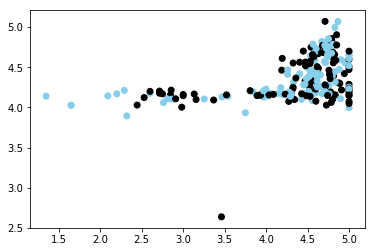

MSE of linear regression 0.446742243722
Average rating actual  4.332818189876603
Average rating predicted  4.35350818927
--- 0.204437255859375 seconds ---


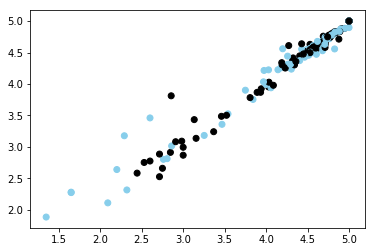

MSE of random forests 0.0236548382991
Average rating actual  4.332818189876603
Average rating predicted  4.36146279952
--- 0.37198686599731445 seconds ---


In [74]:
train,test,train_target,test_target=train_test_split(linear_reg[['tf_scores','dislike_count','like_count']], linear_reg['average_rating'], test_size=0.25, random_state=1)
start_time = time.time()
lm = LinearRegression()
lm.fit(train,train_target)
predicted=lm.predict(test)
print(predicted.shape)
print(test_target.shape)
plt.scatter(test_target,predicted,c=["skyblue","black"])
plt.show()
print("MSE of linear regression",metrics.mean_squared_error(test_target,predicted))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",predicted.mean())
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
forest_std = forest_std.fit(train, train_target)
result=forest_std.predict(test)
output=pd.DataFrame(data={"Original":test_target, "Result":result})
plt.scatter(test_target,result,c=["skyblue","black"])
plt.show()
print("MSE of random forests",metrics.mean_squared_error(test_target,result))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",result.mean())
print("--- %s seconds ---" % (time.time() - start_time))

In [67]:
trump_speech_df['tf_mean_scores']=new.iloc[:5999].mean(axis=1)
trump_speech_df['tf_std_scores']=np.std(new)
trump_speech_df['tf_median_scores']=np.median(new)

In [68]:
trump_speech_df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,subtitle1,tokenized_subtitle,subtitle_stop,subtitle_lemma,data,tf_scores,tf_mean_scores,tf_std_scores,tf_median_scores
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,presidents of the united states mr go tr...,"[presidents, of, the, united, states, mr, go, ...","[presidents, united, states, mr, go, trapp, fa...","[president, united, state, mr, go, trapp, fami...",president united state mr go trapp family than...,16.688594,0.002781,0.010058,0.0
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,it s now officially tuesday november a di...,"[it, s, now, officially, tuesday, november, a,...","[officially, tuesday, november, ever, think, h...","[officially, tuesday, november, ever, think, h...",officially tuesday november ever think hearing...,26.993521,0.004499,0.007617,0.0
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,you music music music you i...,"[you, music, music, music, you, i, you, the, g...","[music, music, music, greatness, country, lead...","[music, music, music, greatness, country, lead...",music music music greatness country leader fre...,23.072657,0.003845,0.008385,0.0
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,we welcome stars and president music ...,"[we, welcome, stars, and, president, music, al...","[welcome, stars, president, music, place, live...","[welcome, star, president, music, place, live,...",welcome star president music place live place ...,25.303389,0.004217,0.008284,0.0
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,you thank you music great people gr...,"[you, thank, you, music, great, people, granna...","[thank, music, great, people, granna, three, d...","[thank, music, great, people, granna, three, d...",thank music great people granna three day goin...,28.200446,0.004700,0.014248,0.0


In [69]:
linear_reg_mean = trump_speech_df[['tf_mean_scores','dislike_count','like_count','average_rating']]
linear_reg_std = trump_speech_df[['tf_std_scores','dislike_count','like_count','average_rating']]
linear_reg_median = trump_speech_df[['tf_median_scores','dislike_count','like_count','average_rating']]
linear_reg_all = trump_speech_df[['tf_median_scores','tf_scores','tf_std_scores','tf_mean_scores','dislike_count','like_count','average_rating']]

(209,)
(209,)


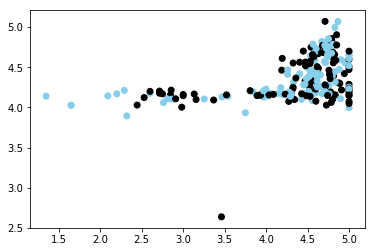

MSE of linear regression 0.446742243722
Average rating actual  4.332818189876603
Average rating predicted  4.35350818927
--- 0.2174837589263916 seconds ---


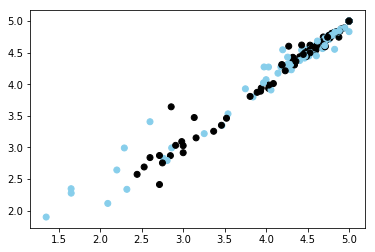

MSE of random forests 0.0214387922794
Average rating actual  4.332818189876603
Average rating predicted  4.35884840532
--- 0.38669490814208984 seconds ---


In [75]:
train,test,train_target,test_target=train_test_split(linear_reg_mean[['tf_mean_scores','dislike_count','like_count']], linear_reg_mean['average_rating'], test_size=0.25, random_state=1)
start_time = time.time()
lm = LinearRegression()
lm.fit(train,train_target)
predicted=lm.predict(test)
print(predicted.shape)
print(test_target.shape)
plt.scatter(test_target,predicted,c=["skyblue","black"])
plt.show()
print("MSE of linear regression",metrics.mean_squared_error(test_target,predicted))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",predicted.mean())
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
forest_std = forest_std.fit(train, train_target)
result=forest_std.predict(test)
output=pd.DataFrame(data={"Original":test_target, "Result":result})
plt.scatter(test_target,result,c=["skyblue","black"])
plt.show()
print("MSE of random forests",metrics.mean_squared_error(test_target,result))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",result.mean())
print("--- %s seconds ---" % (time.time() - start_time))

(209,)
(209,)


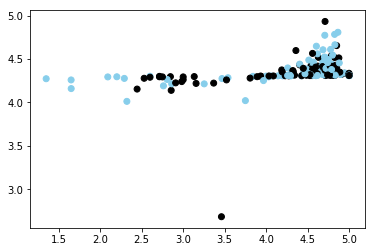

MSE of linear regression 0.495515875681
Average rating actual  4.332818189876603
Average rating predicted  4.34936523865
--- 0.20990562438964844 seconds ---


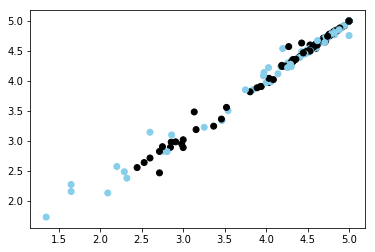

MSE of random forests 0.010208993985
Average rating actual  4.332818189876603
Average rating predicted  4.35171685396
--- 0.3526129722595215 seconds ---


In [76]:
train,test,train_target,test_target=train_test_split(linear_reg_median[['tf_median_scores','dislike_count','like_count']], linear_reg_median['average_rating'], test_size=0.25, random_state=1)
start_time = time.time()
lm = LinearRegression()
lm.fit(train,train_target)
predicted=lm.predict(test)
print(predicted.shape)
print(test_target.shape)
plt.scatter(test_target,predicted,c=["skyblue","black"])
plt.show()
print("MSE of linear regression",metrics.mean_squared_error(test_target,predicted))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",predicted.mean())
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
forest_std = forest_std.fit(train, train_target)
result=forest_std.predict(test)
output=pd.DataFrame(data={"Original":test_target, "Result":result})
plt.scatter(test_target,result,c=["skyblue","black"])
plt.show()
print("MSE of random forests",metrics.mean_squared_error(test_target,result))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",result.mean())
print("--- %s seconds ---" % (time.time() - start_time))

(209,)
(209,)


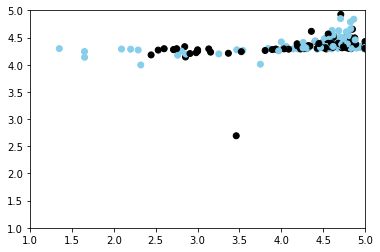

MSE of linear regression 0.493133613311
Average rating actual  4.332818189876603
Average rating predicted  4.34745816942
--- 0.20855426788330078 seconds ---


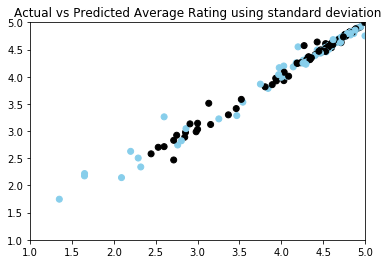

MSE of random forests 0.0117287078907
Average rating actual  4.332818189876603
Average rating predicted  4.35287871759
--- 0.3519573211669922 seconds ---


In [93]:
train,test,train_target,test_target=train_test_split(linear_reg_std[['tf_std_scores','dislike_count','like_count']], linear_reg_median['average_rating'], test_size=0.25, random_state=1)
start_time = time.time()
lm = LinearRegression()
lm.fit(train,train_target)
predicted=lm.predict(test)
print(predicted.shape)
print(test_target.shape)
plt.scatter(test_target,predicted,c=["skyblue","black"])
plt.xlim(1.0, 5.0)
plt.ylim(1.0, 5.0)
plt.show()

print("MSE of linear regression",metrics.mean_squared_error(test_target,predicted))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",predicted.mean())
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
forest_std = RandomForestRegressor(n_estimators = 100) 
forest_std = forest_std.fit(train, train_target)
result=forest_std.predict(test)
output=pd.DataFrame(data={"Original":test_target, "Result":result})
plt.scatter(test_target,result,c=["skyblue","black"])
plt.xlim(1.0, 5.0)
plt.ylim(1.0, 5.0)
plt.title('Actual vs Predicted Average Rating using standard deviation')
plt.show()
print("MSE of random forests",metrics.mean_squared_error(test_target,result))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",result.mean())
print("--- %s seconds ---" % (time.time() - start_time))

(209,)
(209,)


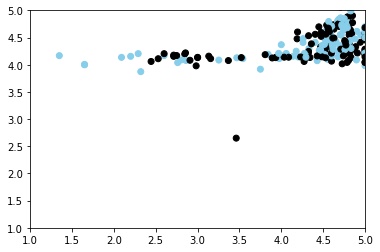

MSE of linear regression 0.443711086719
Average rating actual  4.332818189876603
Average rating predicted  4.35122482605
--- 0.17648911476135254 seconds ---


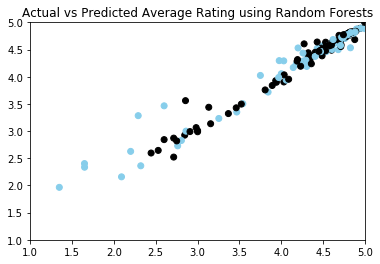

MSE of random forests 0.0251397550097
Average rating actual  4.332818189876603
Average rating predicted  4.35122482605
--- 0.4045834541320801 seconds ---


In [99]:
train,test,train_target,test_target=train_test_split(linear_reg_all[['tf_std_scores','tf_scores','tf_median_scores','tf_mean_scores','dislike_count','like_count']], linear_reg_all['average_rating'], test_size=0.25, random_state=1)
start_time = time.time()
lm = LinearRegression()
lm.fit(train,train_target)
predicted=lm.predict(test)
print(predicted.shape)
print(test_target.shape)
plt.scatter(test_target,predicted,c=["skyblue","black"])
plt.xlim(1.0, 5.0)
plt.ylim(1.0, 5.0)
plt.show()
# print(metrics.mean_squared_error(test_target,predicted))
print("MSE of linear regression",metrics.mean_squared_error(test_target,predicted))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",predicted.mean())
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()
forest_std = RandomForestRegressor(n_estimators = 100) 
forest_std = forest_std.fit(train, train_target)
result=forest_std.predict(test)
output=pd.DataFrame(data={"Original":test_target, "Result":result})
plt.scatter(test_target,result,c=["skyblue","black"])
plt.title('Actual vs Predicted Average Rating using Random Forests')
plt.xlim(1.0, 5.0)
plt.ylim(1.0, 5.0)
plt.show()
# print(metrics.mean_squared_error(test_target,result))
print("MSE of random forests",metrics.mean_squared_error(test_target,result))
print("Average rating actual ",test_target.mean())
print("Average rating predicted ",predicted.mean())
print("--- %s seconds ---" % (time.time() - start_time))

In [89]:
from wordcloud import WordCloud
word = pd.DataFrame(trump_speech_df['data'])
wordcloud1 = WordCloud().generate(str(trump_speech_df['data']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

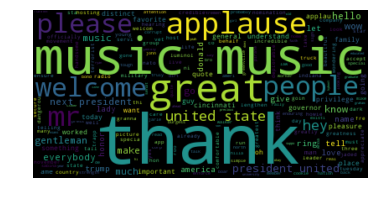